# Contents<a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#overview)
* [Stage 2. Data preprocessing](#preprocessing)
    * [2.1 Missing Values](#missing)
    * [2.2 Convert to datetime](#datetime)
    * [2.3 Calculate average mileage](#avg_mile)
    * [2.4 Categorize Data](#categorize)
* [Stage 3. EDA](#eda)
    * [3.1 Study core parameters](#core_para)
    * [3.2 Treat outliers](#outliers)
    * [3.3 Ads lifetime](#lifetime)
    * [3.4 Average price per type of vehicle](#avg_price)
    * [3.5 Price factors of vehicle type for Top 2 highest ads](#price_fac)
 * [Conclusion](#end)

# Introduction<a id='intro'></a>

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. Study data collected over the last few years and determine which factors influence the price of a vehicle.

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data file into a DataFrame

df= pd.read_csv('/datasets/vehicles_us.csv')

## Stage 1. Data overview<a id='overview'></a>

The dataset contains the following fields:
- `price`- price of the vehicle sold at.
- `model_year` - the year the vehicle is launched
- `model`- specific version or variation of a vehicle
- `condition` - the state of the vehicle
- `cylinders` - a vital part in engine, the more cylinders, the more power it generates in a vehicle
- `fuel` — gas, diesel, etc.
- `odometer` — an instrument for measuring the distance travelled by a wheeled vehicle
- `transmission`- there are different types of transmission. Mainly automatic, manual and others.
- `paint_color` - color of the vehicles
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


**Observation**

There are missing values in this data. Missing value columns are:

1. model_year
2. cylinders
3. odometer
4. paint_color
5. is_4wd 

"is_4wd" column shows the most missing value. However, this columns seems to have Boolean values with 1 = True value. 


In [5]:
# Check total nan values for each column

nan_df = df.isnull().sum()

display(nan_df)

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
def missing_values_info(dataframe):
    missing_report = df.isna().sum().rename("num_missing").to_frame()
    missing_report["missing%"] = (missing_report["num_missing"] / df.shape[0] ).round(4) * 100
    return(missing_report.query("num_missing > 0"))

display(missing_values_info(df))

,num_missing,missing%
model_year,3619,7.02
cylinders,5260,10.21
odometer,7892,15.32
paint_color,9267,17.99
is_4wd,25953,50.37


## Stage 2. Data preprocessing<a id='preprocessing'></a>

### Missing values<a id='missing'></a>

**Column `is_4wd`**

In [7]:
# check unique values in `is_4wd` column

df['is_4wd'].unique()

array([ 1., nan])

**Observation:**

Since there are only 2 values, '1.' and 'nan', it is clear that this is a boolean value. Therefore, 'nan' will be replace by '0' and check the unique value again.

In [8]:
df['is_4wd'].fillna(0, inplace=True)

df['is_4wd'].unique()

array([1., 0.])

In [9]:
# check if the values are replace

print(df.isna().sum())

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


The missing values! Let's move on to analyse missing values in model years.

**Column `model_year`**

In [10]:
# calculate the median of the model year for each model.

df_groupby = df.groupby(['model'])['model_year'].median()
print(df_groupby)

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64


In [11]:
# make a dictionary for each model with their median model_year with the data above.

df_dict= df_groupby.to_dict()

In [12]:
# use the dictionary to fill in the missing values in model_year.

df['model_year'] = df['model_year'].fillna(df['model'].map(df_dict))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Column `cylinders`**

In [13]:
# calculate the median of the number of cylinders for each model.

df_groupby = df.groupby(['model'])['cylinders'].median()
print(df_groupby)

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64


In [14]:
# make a dictionary for each model with the data above.

df_dict= df_groupby.to_dict()

In [15]:
# use the dictionary to fill in the missing values in cylinders.

df['cylinders'] = df['cylinders'].fillna(df['model'].map(df_dict))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Column `odometer`**

In [16]:
# calculate the median of the odometer for each model.

df_groupby = df.groupby(['condition'])['odometer'].median()
print(df_groupby)

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64


In [17]:
# Find median of odometer, based on the condition of the vehicle

median_odometer = df.groupby("condition")["odometer"].transform(lambda x: x.median())
df["odometer"].fillna(median_odometer, inplace=True)

In [18]:
# Check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Column `paint_color`**

In [19]:
# can't use mean or median to replace as paint color is not a numeric number
# So, we will use the most common color

print(df['paint_color'].value_counts())

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


In [20]:
# white is the most common color
# let's replace the missing value to 'not available'

df['paint_color'] = df['paint_color'].fillna('not available')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Convert to datetime<a id='datetime'></a>

Convert the date_posted column to a date time format.

In [21]:
# check the data type for date_posted column and how is the date written

print(type('date_posted'))
df.head()

<class 'str'>


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not available,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,not available,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [22]:
# since it is a string, lets convert it to datetime values for date_posted column

df['date_posted'] = pd.to_datetime(df['date_posted'], format= '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


### Calculate average mileage<a id='avg_mile'></a>

Find out the age of the vehicle when the ad is posted. Calculate the average mileage.

In [23]:
# use DatetimeIndex to access the date time data, create a new column for day, month and year

df['day_posted'] = pd.DatetimeIndex(df['date_posted']).day
df['month_posted'] = pd.DatetimeIndex(df['date_posted']).month
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year

In [24]:
# Convert model_year to integer

df['model_year'] = df['model_year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_posted    51525 non-null  int64         
 14  month_posted  51525 non-null  int64         
 15  year_posted   51525 non-null  int64 

In [25]:
# calculate the vehicle's age when the ad was placed and add to a new data column

df['age'] = df['year_posted'] - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not available,1.0,2018-06-23,19,23,6,2018,7
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,7
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,not available,0.0,2019-03-22,9,22,3,2019,16
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2


In [26]:
# Calculate the vehicle's average mileage per year

df['mileage'] = df['odometer'] / df['age']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_posted    51525 non-null  int64         
 14  month_posted  51525 non-null  int64         
 15  year_posted   51525 non-null  int64 

In [27]:
# Check missing value in mileage and investigate the issue

df[df['mileage'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age,mileage
17037,45400,2018,ram 3500,excellent,6.0,diesel,0.0,automatic,pickup,black,1.0,2018-12-16,18,16,12,2018,0,NaN
40489,15900,2018,toyota prius,excellent,4.0,hybrid,0.0,automatic,hatchback,blue,0.0,2018-07-30,31,30,7,2018,0,NaN


In [28]:
# the ads is posted in the same year as the model_year
# let's replace the missing value with 0 since the odometer is also 0

df['mileage'] = df['mileage'].fillna(0)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age,mileage
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not available,1.0,2018-06-23,19,23,6,2018,7,20714.285714
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,not available,0.0,2019-03-22,9,22,3,2019,16,11350.812500
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2,40451.500000


### Categorize Data<a id='categorize'></a>

**Next**, replace the condition values with a numeric scale for easier data manipulation.

In [29]:
# check unique values of condition column

df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

**Action:**

Replace string values with a numeric scale:
(new = 5 ;
like new = 4 ;
excellent = 3 ;
good = 2 ; 
fair = 1 ;
salvage = 0)

In [30]:
# let's write a function for that

rate ={
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

In [31]:
# create a new column to store the numeric scale

df['condition_rate'] = df['condition'].replace(rate)

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [32]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       51525 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  float64       
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  day_posted      51525 non-null  int64         
 14  month_posted    51525 non-null  int64         
 15  ye

In [33]:
# print a sample of data

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age,mileage,condition_rate
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not available,1.0,2018-06-23,19,23,6,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,not available,0.0,2019-03-22,9,22,3,2019,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,20,6,2018,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,27,12,2018,3,26404.000000,3
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7,1,2019,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,not available,1.0,2018-07-16,19,16,7,2018,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,15,2,2019,11,13381.000000,3


# EDA<a id='eda'></a>

## Study core parameters<a id='core_para'></a>

The parameters to study are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition_rate

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

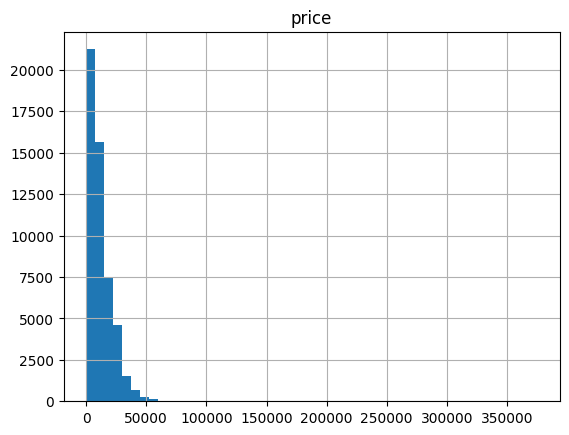

In [34]:
# Plot price in histogram

df.hist('price', bins=50)

**Observation:**

There are many vehicles priced within 0 - 50,000 and a sharp peak at 0. Is that possible to sell a vehicle at 0? After 50,000 dollars, the bar is not visible at all. Between 0 and 50,000 dollars, the difference is too big and it is positive that there are outliners.

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

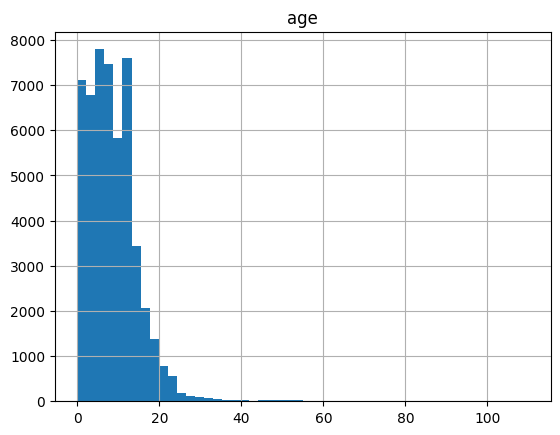

In [35]:
# Plot vehicle_age in histogram

df.hist('age', bins=50)

**Observation:**

The data of the age of these vehicles sold are condensed around age 0 - 20. After age 40, there is lesser vehicles sold and the bar cannot be seen anymore. This shows the preference that people often purchase vehicles that are below 20 year old.


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

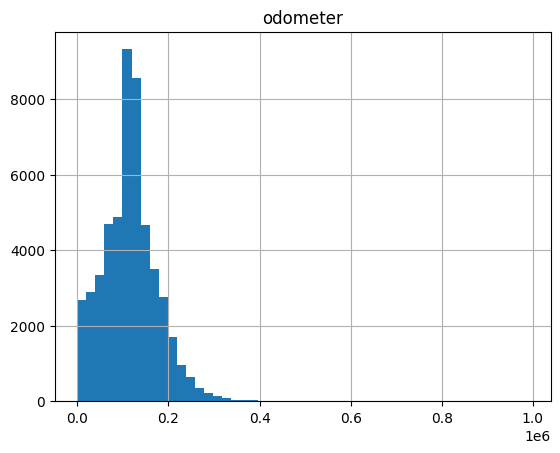

In [36]:
# Plot mileage in histogram

df.hist('odometer', bins=50)

**Observation:**

Most vehicles sold has a mileage of 0 - 200,000 according to the histogram.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

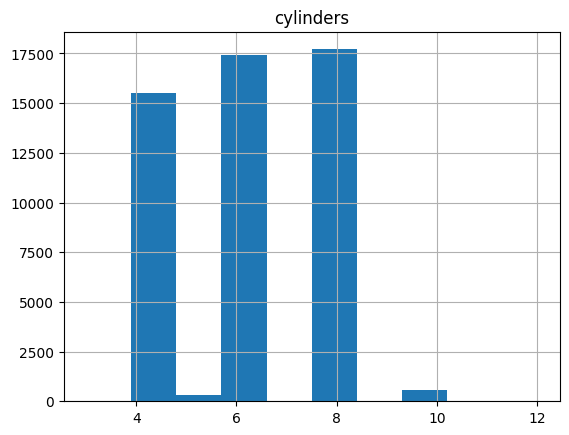

In [37]:
# Plot cylinders in histogram

df.hist('cylinders')

**Observation:**

The histogram looks very stable. There is a standard number of cylinders for vehicles so the data won't skew over very much. Most vehicles sold have 6 & 8 cylinders. There are a few odd cylinder count at less than 4 and between 6 and 4. Could be an outliner in this case.

array([[<AxesSubplot:title={'center':'condition_rate'}>]], dtype=object)

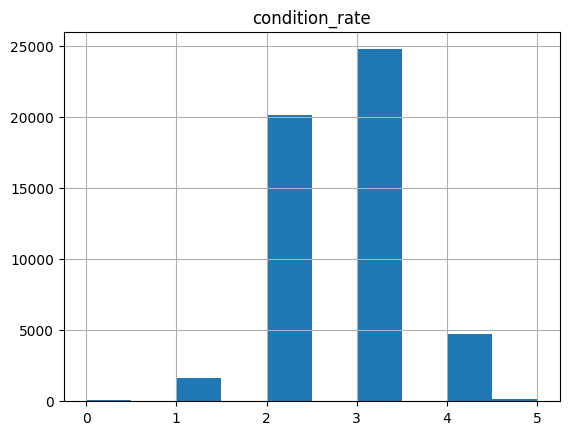

In [38]:
# Plot condition_rate in histogram

df.hist('condition_rate')

**Observation:**

The histogram looks stable with clear bars for each condition rate. The vehicles sold are mostly rate at 2 and 3 (2=good and 3 = excellent).

## Treat outliers<a id='outliers'></a>

Check the below columns for outliners.
1. price
2. age
3. odometer
4. cylinders
5. condition_rate

To remove outliners:
1. Determine Q1,Q3 and IQR of each column data
2. Use data above to determine the lower limits and upper limits for outliers
3. Store data without outliers in a separate DataFrame

In [39]:
# Write formula to determine lower limits and upper limits of data

def identify_upper_lower_limits(df, columns):
    lower_limits = {}
    upper_limits = {}

    for column in columns:
        # Extract the column from the DataFrame
        data = df[column]

        # Calculate quartiles
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Store the results in dictionaries
        lower_limits[column] = lower_limit
        upper_limits[column] = upper_limit

    return lower_limits, upper_limits

In [40]:
# Lower limits and Upper limits for each column

columns_to_check = ['price', 'age','odometer','cylinders','condition_rate']
lower_limits, upper_limits = identify_upper_lower_limits(df, columns_to_check)

print(lower_limits)
print()
print(upper_limits)

{'price': -12758.5, 'age': -8.0, 'odometer': -32561.5, 'cylinders': -2.0, 'condition_rate': 0.5}

{'price': 34597.5, 'age': 24.0, 'odometer': 256050.5, 'cylinders': 14.0, 'condition_rate': 4.5}


In [41]:
# Store data without outliers in a separate DataFrame

df_without_outlier = df.copy()

# write a function to seperate the data without outliers

for column in columns_to_check:
    df_without_outlier = df_without_outlier[(df_without_outlier[column] >= lower_limits[column]) & (df_without_outlier[column] <= upper_limits[column])]    

In [42]:
# print data without outliers

df_without_outlier.shape

(48092, 19)

**Study core parameters without outliers**

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

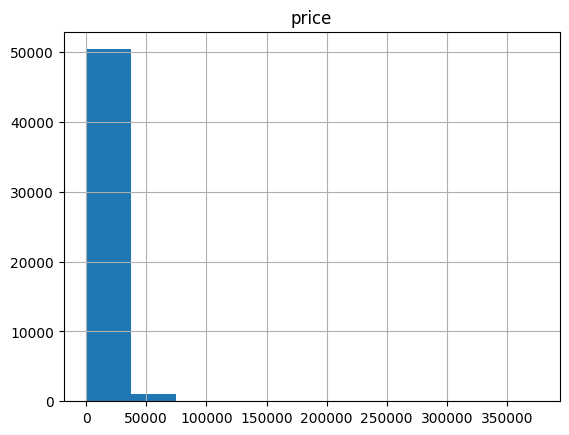

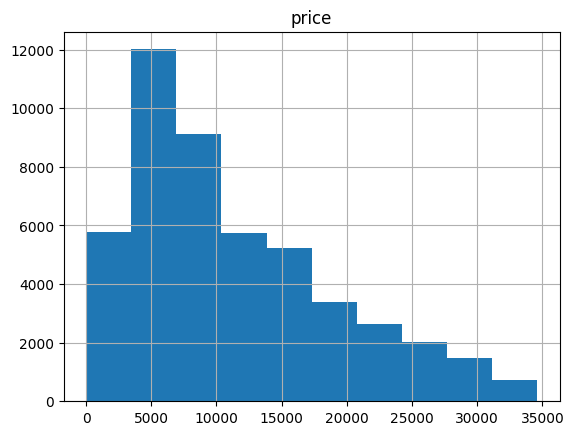

In [43]:
# Histogram for price

df.hist('price')
df_without_outlier.hist('price')

**Observation:**

Vehicles are mostly purchase at around 5000 dollars. There are still quite a number of vehicles purchased around 0 dollars. Gradually, as the price gets higher, the quantity of vehicles sold are getting lesser.

In conclusion, this graph shows that people prefer to purchase vehicles at a cheaper price.

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

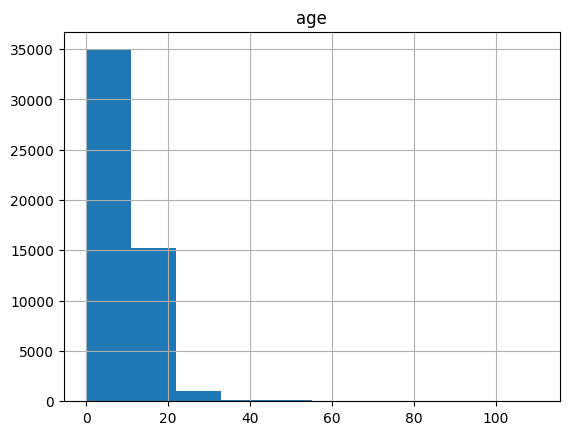

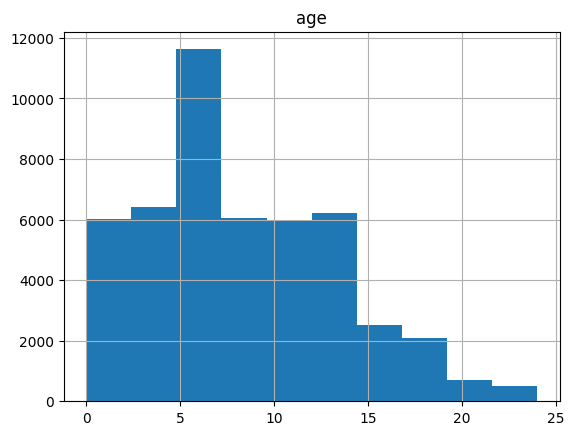

In [44]:
# Histogram for age

df.hist('age')
df_without_outlier.hist('age')

**Observation:**

Most vehicles sold are around 5 years to approximately 7 years of age. Typically, people prefer vehicles that are below age of 14.

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

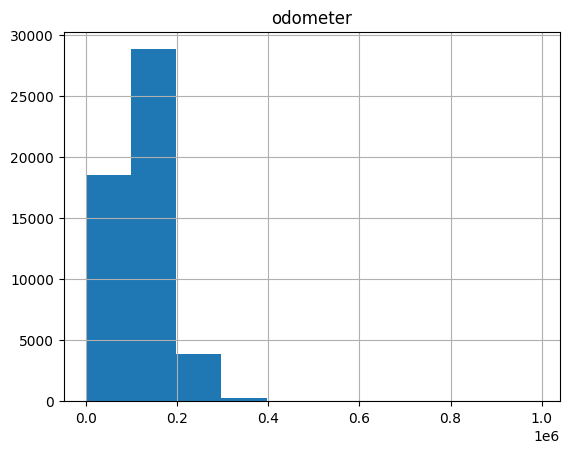

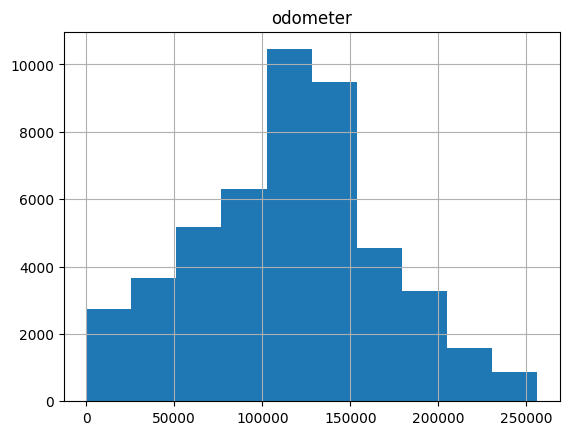

In [45]:
# Histogram for odometer

df.hist('odometer')
df_without_outlier.hist('odometer')

**Observation:**

The vehicles frequently purchased have an odometer count of around 100,000 - 130,000.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

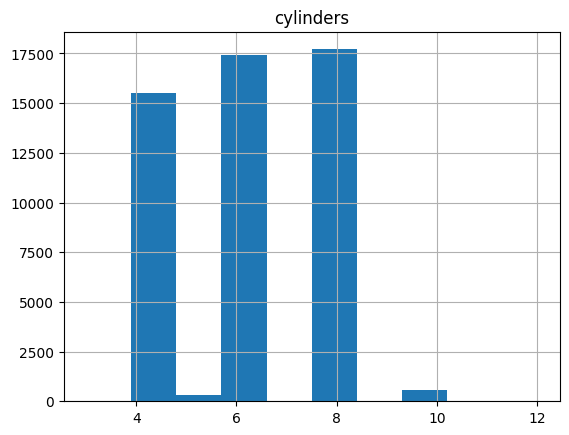

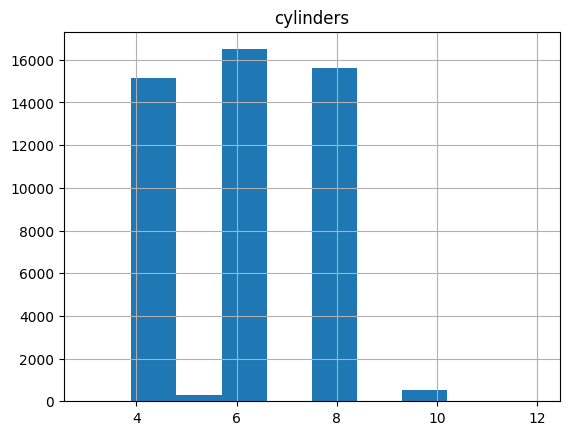

In [46]:
# Histogram for cylinders

df.hist('cylinders')
df_without_outlier.hist('cylinders')

**Observation:**

The graph for cylinders shows not much changes between the unfiltered dataset and the filtered dataset.

array([[<AxesSubplot:title={'center':'condition_rate'}>]], dtype=object)

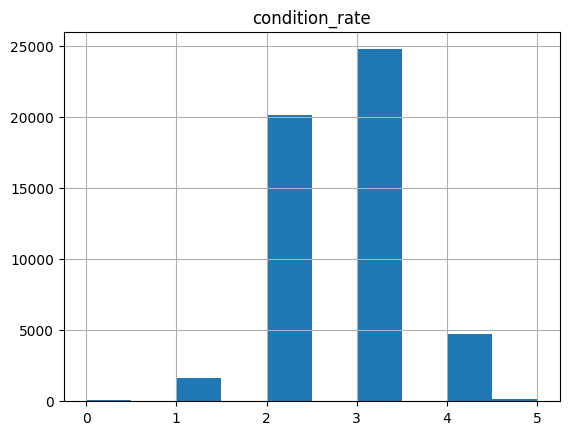

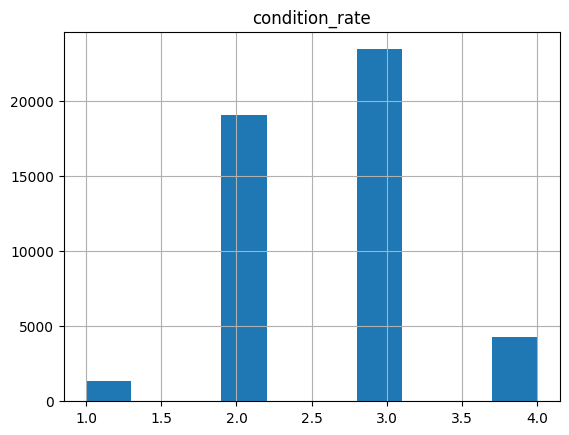

In [47]:
# Histogram for condition_rate

df.hist('condition_rate')
df_without_outlier.hist('condition_rate')

**Observation:**

The graph for condition rate shows not much changes as well between the unfiltered dataset and the filtered dataset.Except, probably a much clearer scale and we can see the bar clearer for rate no. 1.

## Ads lifetime<a id='lifetime'></a>

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

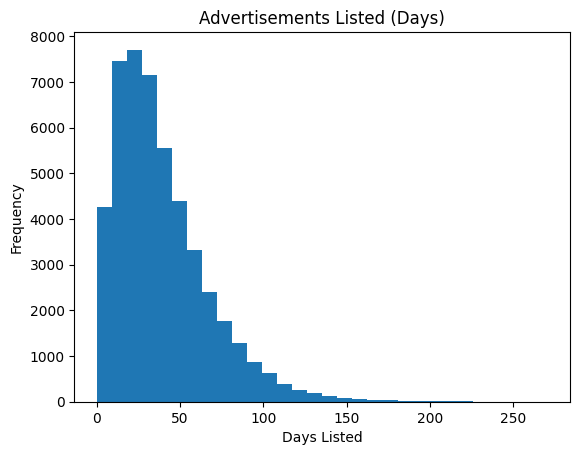

In [48]:
days_listed = df_without_outlier['days_listed']

# Plot histogram

plt.hist(days_listed, bins=30)
plt.title('Advertisements Listed (Days)')
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
plt.show()

In [49]:
# calculate mean

df_without_outlier['days_listed'].mean()

39.54508026282958

In [50]:
# calculate median 

df_without_outlier['days_listed'].median()

33.0

**Observation**


From the mean and median, we can conclude that on average, a vehicle is sold within 33 - 39 days after the ads is posted.


According to the histogram, we can see a higher frequency of vehicles sold when advertisments are freshly posted from 0 - 30 days. After that, there are lesser vehicles sold as the number of advertisment days listed gets longer. 

## Average price per each type of vehicle<a id='avg_price'></a>

- Analyze the number of ads and the average price for each type of vehicle. 
- Plot a graph showing the dependence of the number of ads on the vehicle type. 
- Select the two types with the greatest number of ads.

In [51]:
# Group by vehicle type and calculate the count and average price
vehicle_stats = df_without_outlier.groupby('type').agg({'price': ['count', 'mean']}).reset_index()

# Rename the columns for clarity
vehicle_stats.columns = ['type','number_of_ads', 'average_price']

# Sort by the number of ads in descending order
vehicle_stats.sort_values(by='number_of_ads', ascending=False, inplace=True)

# Print the number of ads and the average price for each type of vehicle
print(vehicle_stats)

           type  number_of_ads  average_price
9         sedan          11920    6978.670218
0           SUV          11851   10468.690743
10        truck          11047   15159.958631
8        pickup           6253   15079.576523
3         coupe           2017   13484.701041
12        wagon           1497    9012.832999
5      mini-van           1138    8057.882250
4     hatchback            998    6851.443888
11          van            577    8887.902946
2   convertible            351   12853.660969
7         other            237   10482.776371
6       offroad            183   14292.989071
1           bus             23   17445.913043


**Findings:** Sedan and SUV type has the greatest number of ads

In [52]:
# Import seaborn

import seaborn as sns

<AxesSubplot:xlabel='type', ylabel='number_of_ads'>

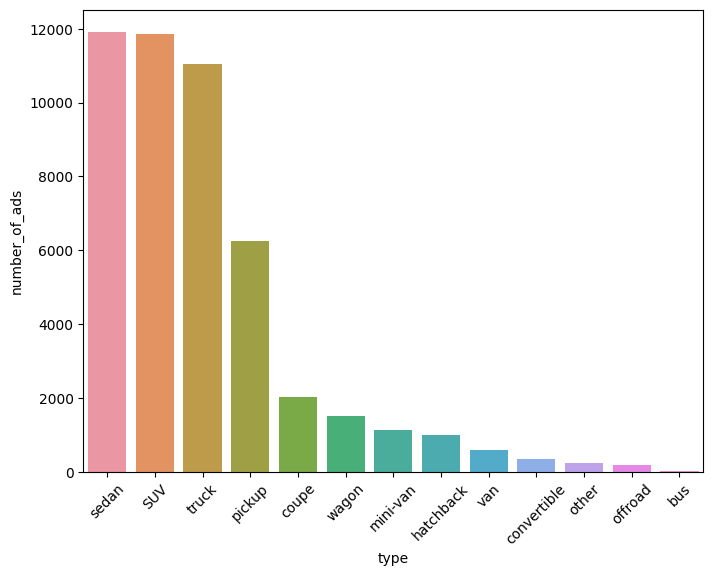

In [53]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.barplot(x='type', y='number_of_ads', data=vehicle_stats)

**Conclusion:** 

Sedan and SUV type has the greatest number of ads. These 2 types will be use to run our analysis on what affects the price most.

## Price factors of vehicle type for Top 2 highest ads<a id='price_fac'></a>

In [54]:
# For Sedan

columns = ['model', 'price', 'age','mileage', 'condition_rate', 'transmission', 'paint_color']
df_sedan = df_without_outlier[df_without_outlier['type']=='sedan'][columns]

In [55]:
# Correlation

df_sedan.corr()

,price,age,mileage,condition_rate
price,1.000000,-0.615602,0.313457,0.288134
age,-0.615602,1.000000,-0.540947,-0.294837
mileage,0.313457,-0.540947,1.000000,0.047443
condition_rate,0.288134,-0.294837,0.047443,1.000000


<AxesSubplot:xlabel='age', ylabel='price'>

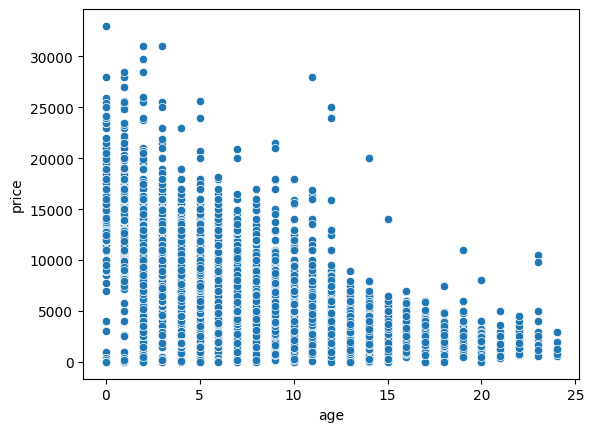

In [56]:
sns.scatterplot(x=df_sedan['age'], y=df_sedan['price'])

**Observation:** 
    
The scatterplot is showing a downward trend. It seems that the older the age of the vehicle, the cheaper the price will be. 

Looking at the correlation table, the relationship of price-to-age is a -0.6. It has a negative strong correlation as 0.6 is closer to 1. That means, the vehicle's age will highly affect the price of the vehicle.

<AxesSubplot:xlabel='mileage', ylabel='price'>

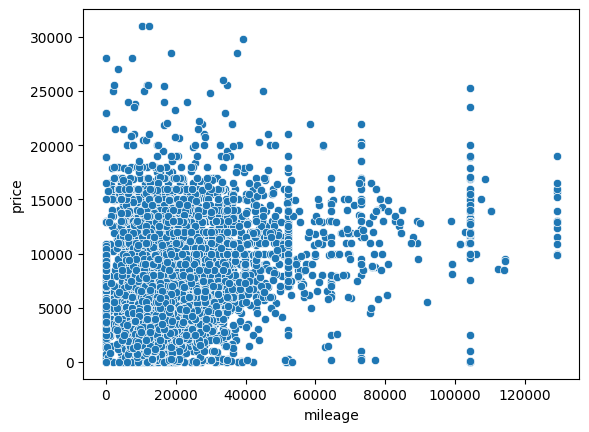

In [57]:
sns.scatterplot(x=df_sedan['mileage'], y=df_sedan['price'])

<AxesSubplot:xlabel='condition_rate', ylabel='price'>

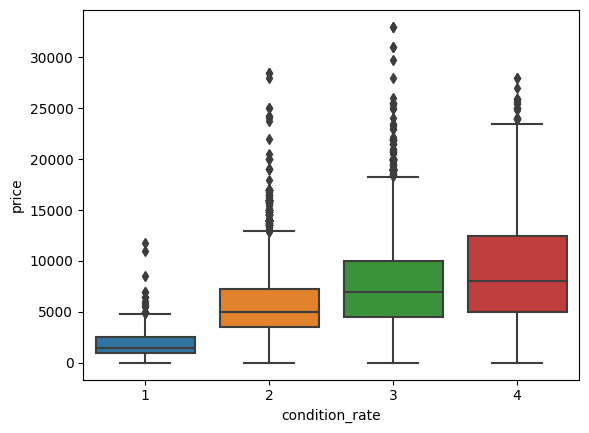

In [58]:
sns.boxplot(x='condition_rate', y='price', data=df_sedan[df_sedan['condition_rate'].map(df_sedan['condition_rate'].value_counts()) > 50])

<AxesSubplot:xlabel='transmission', ylabel='price'>

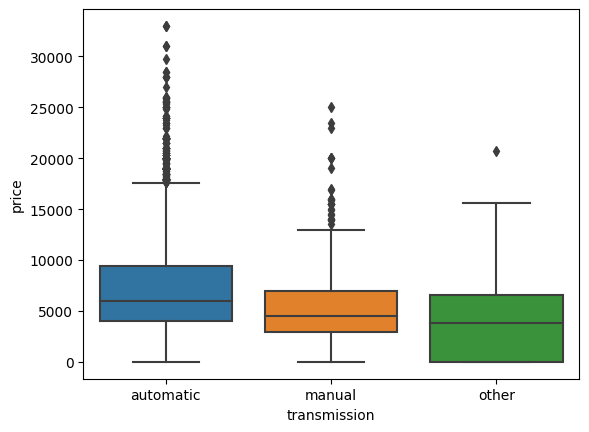

In [59]:
sns.boxplot(x='transmission', y='price', data=df_sedan[df_sedan['transmission'].map(df_sedan['transmission'].value_counts()) > 50])

<AxesSubplot:xlabel='paint_color', ylabel='price'>

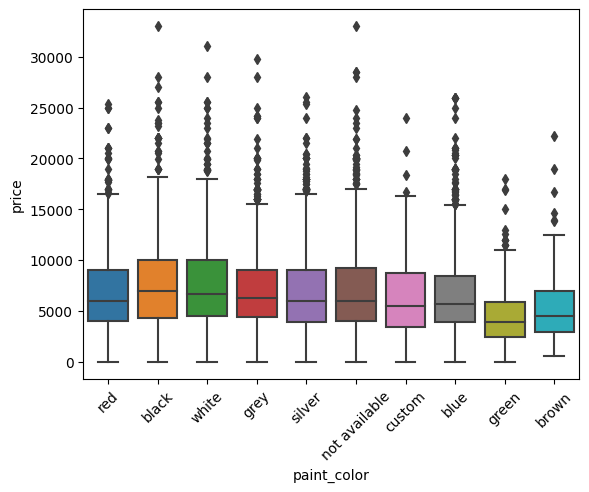

In [60]:
plt.xticks(rotation = 45)
sns.boxplot(x='paint_color', y='price', data=df_sedan[df_sedan['paint_color'].map(df_sedan['paint_color'].value_counts()) > 50])

**Observation:** 

**Price-to-age :** Strong negative correlation at -0.6. The vehicle's age will highly affect the price of the vehicle.

**Price-to-mileage :** Weak positive correlation at 0.3. The vehicle's mileage does not affect the price of the vehicle very much.

**Price-to-condition_rate :** Weak positive correlation at 0.2. Although the boxplot does shows that most vehicle sold are in condition 4 (like new) with a longer body and a higher max price point. But if we look at the boxplot for condition 3 (excellent), there are outliners that are higher than the previous max price point of condition 4. 

**Price-to-transmission :** The vehicle's transmission does affect the price of the vehicle. The graph shows the median of the 3 boxplots (automatic, manual and others) are almost at the same level of price point. However, automatic has more outliners and it hits the maximum price point. That means people prefer automatic vehicles and are willing to pay more for it.

**Price-to-paint_color :** The vehicle's paint color does not affect the price of the vehicle very much. The graph shows the median of all colors are almost at the same level of price point. There are no significant pattern observed in the graph as well.


In [61]:
# For SUV

columns = ['model', 'price', 'age','mileage', 'condition_rate', 'transmission', 'paint_color']
df_suv = df_without_outlier[df_without_outlier['type']=='SUV'][columns]

In [62]:
# Correlation

df_suv.corr()

,price,age,mileage,condition_rate
price,1.000000,-0.572639,0.283481,0.258076
age,-0.572639,1.000000,-0.571544,-0.304737
mileage,0.283481,-0.571544,1.000000,0.052806
condition_rate,0.258076,-0.304737,0.052806,1.000000


<AxesSubplot:xlabel='age', ylabel='price'>

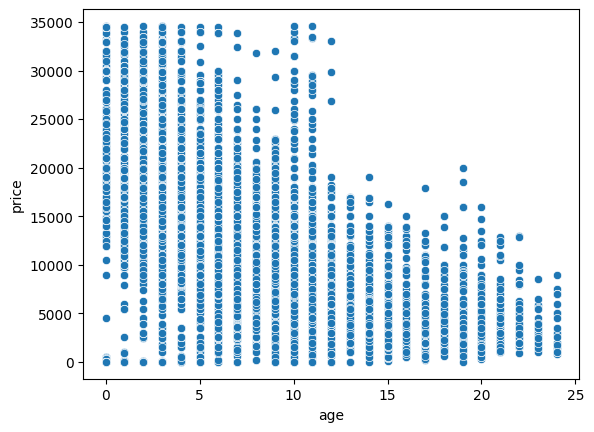

In [63]:
sns.scatterplot(x=df_suv['age'], y=df_suv['price'])

<AxesSubplot:xlabel='mileage', ylabel='price'>

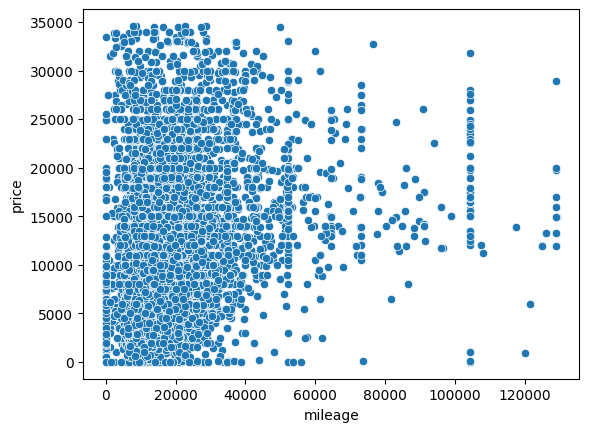

In [64]:
sns.scatterplot(x=df_suv['mileage'], y=df_suv['price'])

<AxesSubplot:xlabel='condition_rate', ylabel='price'>

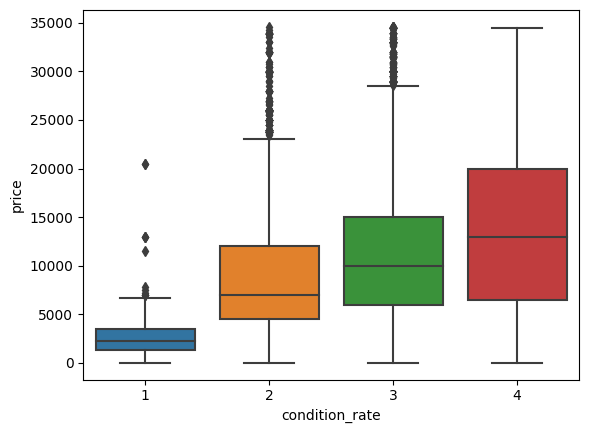

In [65]:
sns.boxplot(x='condition_rate', y='price', data=df_suv[df_suv['condition_rate'].map(df_suv['condition_rate'].value_counts()) > 50])

<AxesSubplot:xlabel='transmission', ylabel='price'>

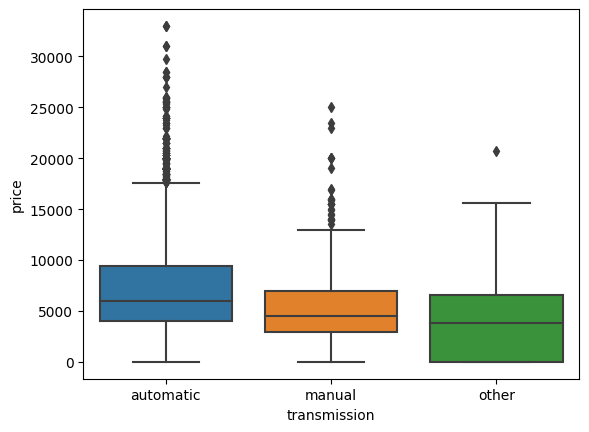

In [66]:
sns.boxplot(x='transmission', y='price', data=df_sedan[df_sedan['transmission'].map(df_sedan['transmission'].value_counts()) > 50])

<AxesSubplot:xlabel='paint_color', ylabel='price'>

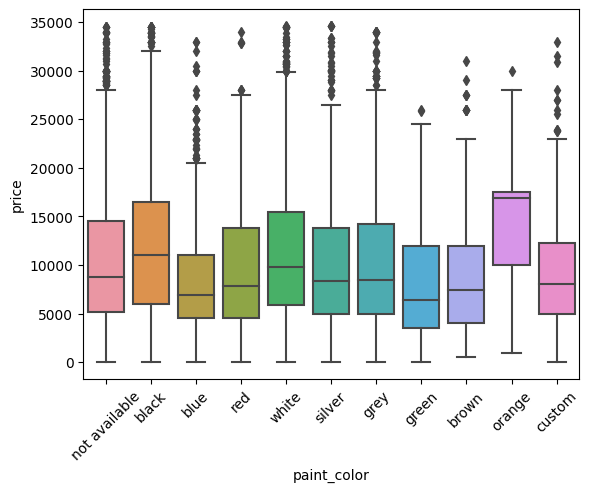

In [67]:
plt.xticks(rotation = 45)
sns.boxplot(x='paint_color', y='price', data=df_suv[df_suv['paint_color'].map(df_suv['paint_color'].value_counts()) > 50])

**Observation:** 

**Price-to-age :** Strong negative correlation at -0.5. The vehicle's age will highly affect the price of the vehicle.

**Price-to-mileage :** Weak positive correlation at 0.2. The vehicle's mileage does not affect the price of the vehicle very much.

**Price-to-condition_rate :** Weak positive correlation at 0.2. The vehicle's condition does not affect the price of the vehicle very much. Although the boxplot of condition 4 (like new) hit the highest maximum price point of the graph, the outliners of condition 2 (good) and 3 (excellent) also reach the highest price point in the graph. Hence, the condition of the vehicle is not a factor that affects the price of the vehicle. 

**Price-to-transmission :** The vehicle's transmission does affect the price of the vehicle. The graph shows the median of the 3 boxplots (automatic, manual and others) are almost at the same level of price point. However, automatic has more outliners and it hits the maximum price point. That means people prefer automatic vehicles and are willing to pay more for it.

**Price-to-paint_color :** The vehicle's paint color does not affect the price of the vehicle very much.There are no significant pattern observed in the graph.


# Conclusion<a id='end'></a>


Based on the data, there are 2 factors that will affect the price of the vehicle. 

1. The strongest factor is definately the age of the vehicle. It has a strong negative correlation of -0.6, backed by calculations. Which means the higher the vehicle's age, the lower the price.

2. The 2nd factor I believe is the transmission of the vehicle. Although the median of the 3 transmission types are almost at the same level of price point, automatic type has more outliners and it hits the maximum price point. That means people prefer automatic vehicles and are willing to pay more for it.

